# TP3

## Introduction

Dans le TD précédent vous avez définit en pseudo code plusieurs algo permettant de sérialiser/désérialiser une var de type $ImagePPM$ vers et depuis le disque dur.
Vous allez mettre en oeuvre dans ce TP la traduction du pseudo code précédemment écrit en Python. Vous allez donc lire et écrire des fichiers. Dans l'environnement que nous utilisons (un notebook JupyterLite), les fichiers qui n'ont pas une extension *.txt* sont considérés comme étant des fichiers encodés en binaire. Cela explique pourquoi vous en pouvez pas visualiser facilement le contenu des fichiers *.ppm*.

Afin de pouvoir simplement vérifier que ce que vous faites est correct, nous avons changé toutes les extensions de fichiers des images *.ppm* en *.txt*
Cela n'empèche pas de charger et afficher les images. Voir par exemple la cellule ci dessous:

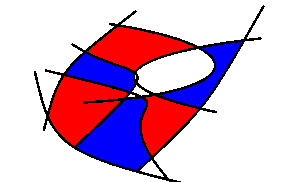

In [1]:
import cv2
from iiwHelper import *

img: ImagePPM = loadImage('./pict/Oeuvre_d_art.txt')
showImage(img)

Vous pouvez ainsi aller dans le répertoire pict et double cliquer sur le fichier './pict/Oeuvre_d_art.txt' pour le visualiser ou modifier aisément.

Si vous veniez à modifier un fichier par mégarde (par exemple en écrivant programmatiquement sur une image par mégarde), il suffit de faire un clic droit -> delete sur le fichier en question pour restaurer l'original.  

## PPM

Dans un premier temps nous considérons le format PPM simplifié (c'est à dire sans commentaire et en permettant de faire des restrictions entre l'utilisation d'espace ou de retour à la ligne pour la sérialisation/désérialisation).

### Sérialisation

Nous commencerons par la sérialisation de l'image. Ainsi la cellule suivante contient le code permettant de charger l'image miniDamier dans une variable nommée $img$ de type $ImagePPM$ tel que définit dans le cours et les TDs précédents. Il permet également de supprimer le potentiel ancien fichier que nous avons créé lors d'exécution précédente; et ouvre un fichier en écriture pour sérialiser notre image.
Complétez le code ci dessous afin d'écrire dans le fichier les informations relatives à l'image $img$.


Si votre code est correct, La dernière ligne de la cellule doit représenter l'image visuellement en dessous de la phrase "image saved". Attention l'image miniDamier est très petite ! Ouvrez l'oeil !

Dans le cas contraire, vous verrez la phrase mais l'exécution de la cellule ne s'arrêtera pas et vous devrez réinitaliser le kernel en cliquant sur 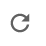

Dans le cas où votre sérialisation n'est pas bonne, allez ouvrir le fichier './pict/modified/miniDamier.txt' pour comprendre ce que vous avez mal fait.
Dans le cas où elle est bonne, testez avec d'autres images

In [ ]:
from io import TextIOWrapper
import cv2
from iiwHelper import *
import os

img: ImagePPM = loadImage("./pict/miniDamier.txt") # charge l'image en mémoire

os.remove("./pict/modified/miniDamier.txt") # s'assure que l'on va travailler sur un nouveau fichier.
file : TextIOWrapper = open("./pict/modified/miniDamier.txt", "w") # ouvre un fichier en écriture pour sérialiser notre image
#écrivez votre code ici:







file.close()
print("image saved")
showImageFromPath("./pict/modified/miniDamier.txt")

image saved


### Désérialisation

Maintenant que vous avez créé un fichier sérialisé avec votre propre code, vous allez le désérialiser. Pour ce faire vous devrez ouvrir le fichier en lecture et à partir de son contenu, créer des variables permettant de stocker les informations nécessaires à la création d'une variable de type $ImagePPM$ en mémoire vive. Une fois l'image créée vous appelerez la fonction $showImage$ avec l'image que vous avez créé en argument afin de voir si celle ci s'affiche correctement. Si c'est le cas, testez avec d'autres images du répertoire $./pict$

In [ ]:
from io import TextIOWrapper
import cv2
from iiwHelper import *

file : TextIOWrapper = open("./pict/modified/miniDamier.txt", "r")

#mettez votre code ici

file.close()

## format IIW

On décide d’inventer un nouveau format de sérialisation qui, on l’espère, devrait permettre de prendre
moins de place sur le disque dur pour chaque image. Pour ce faire on ne veut plus stocker les couleurs
de chacun des pixels dans le fichiers mais uniquement les changements de couleur entre deux pixels
successifs. Pour ce faire nous sommes obligé de stocker le nombre de pixel égaux successifs comme
illustré dans la figure suivante.

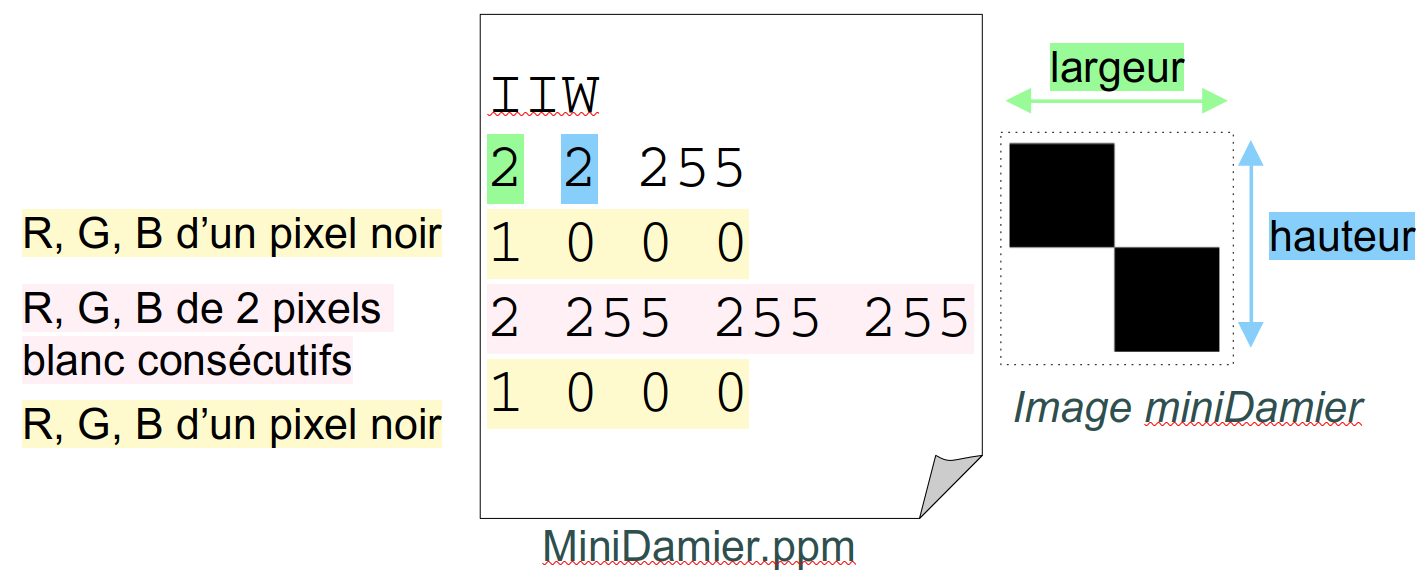</img>

### Sérialisation

Comme pour le premier exercice, chargez une image en mémoire et écrivez le code nécessaire pour écrire les données nécessaires dans un fichier. Cette fois vous ne pourrez pas tester si vous avez implémenté correctement l'algorithme sans écrire la fonction de désérialisation. Par contre vous pouvez aller voir le fichier que vous avez créé pour vérifier si il a la forme attendu ou pas. N'oubliez pas que dans cet environnement pour que vous puissiez voir et modifier facilement le fichier, son extension doit être $.txt$ vous pouvez par exemple nommer le fichier $miniDamier\_iiw.txt$ et le mettre dans le répertoire $pict/modified/$

In [ ]:
from io import TextIOWrapper
import cv2
from iiwHelper import *

#mettez votre code ici

### Désérialiser

Soit un fichier sérialisé selon le format $iiw$ par l'algorithme précédent. Ouvrez ce fichier en lecture et récupérez les informations afin de créer une variable de type $ImagePPM$

In [ ]:
from io import TextIOWrapper
import cv2
from iiwHelper import *

#mettez votre code ici

### Compression avec perte

Afin de tirer partie du format IIW on décide de compresser les images. Cette compression engendrera
une perte de qualité. En effet dans l’image compressée on désire remplacer une suite de n pixels par n
pixels ayant pour valeur r, g , b la moyenne des valeurs r, g , b des n pixels d’origine. En utilisant le format
IIW on aura une réduction significative de la taille sur le disque dur. La figure suivante montre l’image
du parc de valrose avant compression (à gauche) et avec une compression (trop forte ?, à droite) ou
n == 8. La taille du fichier résultant sur le disque est alors de 15% de celui d’origine ! À noter que pour
n == 2 la compression est visuellement très acceptable et l’image résultante occupe 60% de la place de
l’image d’origine sur le disque.

Écrire l’algorithme charge une image de type $ImagePPM$ à partir d'un fichier, crée une nouvelle variable $res$ de type $ImagePPM$ compressée selon la technique définit ci dessus pour un $n$ donné.

Vous pourrez vérifier si votre algorithme est correct en appelant la fonction $showImage$ avec la variable $res$ passée en argument

In [ ]:
from io import TextIOWrapper
import cv2
from iiwHelper import *

#mettez votre code ici

## Format IIW++

On décide d’inventer encore une nouvelle manière de sérialiser les images. Cette fois le fichier contiendra 2 parties. La première partie contiendra uniquement les Pixel de couleurs différentes utilisés dans l’image (c’est à dire la liste des couleurs utilisées). La deuxième partie contiendra $largeur ∗ hauteur$ nombres où chaque nombre donnera la position dans la liste de la première partie de la couleur à utiliser pour le Pixel. La figure suivante illustre ce concept:
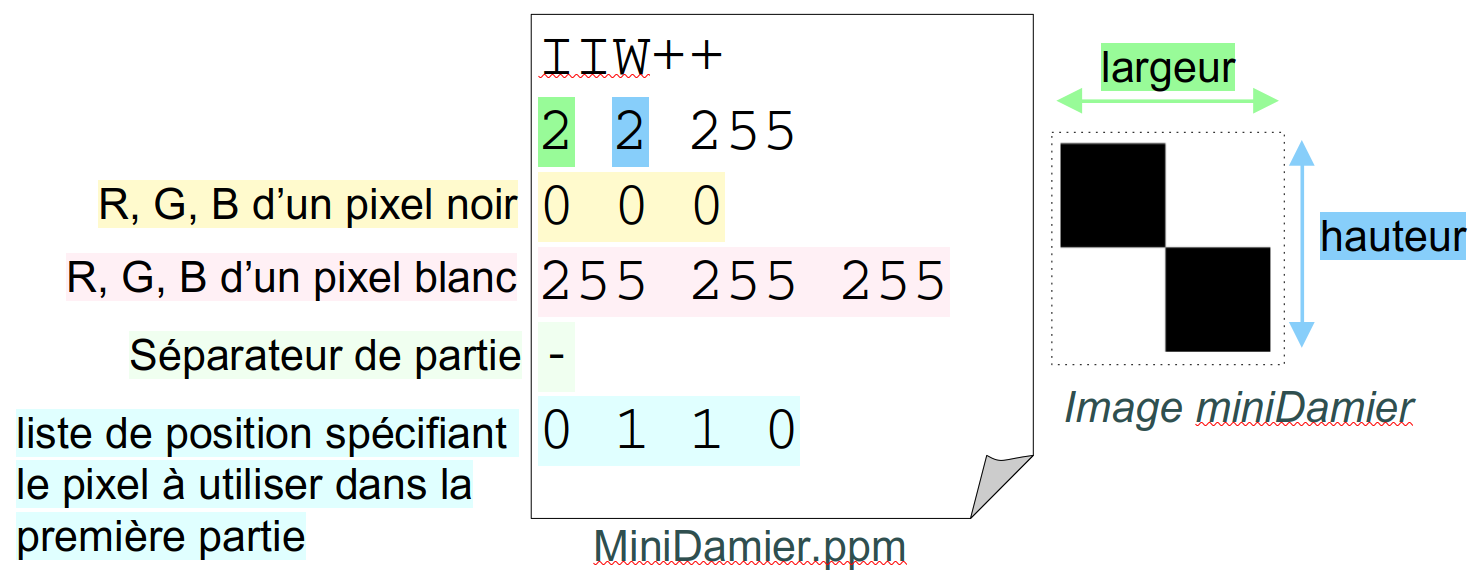</img>


### sérialisation

Écrivez l’algorithme de sérialisation associé à ce format. Vous pourrez vérifier la correction de votre algorithme en regardant le contenu de votre fichier pour une petite image telle que $miniDamier$.

In [7]:
from io import TextIOWrapper
import cv2
from iiwHelper import *

#mettez votre code ici